In [244]:
import pandas as pd
import glob
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from dateutil import parser
import calendar as cl
import seaborn as sns

% matplotlib inline

In [245]:
path = r'YoutubeData/' # use your path
allFiles = glob.glob(path + "/*.csv")

frame = pd.DataFrame()

list_ = []

for file_ in allFiles:
    df = pd.read_csv(file_,index_col=None, header=0)
    list_.append(df)
frame = pd.concat(list_)

In [246]:
frame['Index'] = range(0, len(frame))
frame = frame.set_index('Index')
New = frame.copy()
New = New.iloc[np.random.permutation(len(New))]
New = New.reset_index()
del New['Index']

In [247]:
DT = pd.DataFrame(New[New.DATE.notnull()])

In [248]:
DT = DT.reset_index(drop = True)

In [249]:
DT.head()

,COMMENT_ID,AUTHOR,DATE,CONTENT,CLASS
0,z13aib0jgoiotfxxi04cj5lgulz3zdfrpew,Stuart Mcdonald,2014-11-13T00:38:14,FOLLOW MY COMPANY ON TWITTER thanks. https:/...,1
1,z13mebgjooulgzdkt23kzvlqjyrzx32n0,amine moha,2014-11-06T18:11:37,please like : http://www.bubblews.com/news/927...,1
2,_2viQ_Qnc6-q29okw74KTmVXCvhacMZ5NjAiYdAwHww,Louis Bryant,2013-10-12T15:55:05.693000,You guys should check out this EXTRAORDINARY w...,1
3,z13tgdxgmputf1xfk22jjzhqgpi4v3xo104,Pauline Martinez,2015-05-06T03:21:12.870000,Check out this playlist on YouTube:﻿,1
4,z123eldrazr3wlyd222zitmg1y2jin1rf04,Mahya Roohi,2015-05-21T08:19:31.099000,love!!!!﻿,0


In [250]:
type(DT.DATE[0])

str

In [251]:
DT['new_col'] = DT.DATE.apply(lambda x : parser.parse(x))

In [252]:
type(DT.new_col[0])

pandas._libs.tslib.Timestamp

In [253]:
DT.new_col[0]

Timestamp('2014-11-13 00:38:14')

In [254]:
DT['date'] = [d.date() for d in DT.new_col]
DT['time'] = [d.time() for d in DT.new_col]

In [255]:
print(type(DT.date[0]), type(DT.time[0]))

<class 'datetime.date'> <class 'datetime.time'>


In [256]:
len(DT.date)

1711

In [257]:
len(DT.date.value_counts())

326

In [258]:
len(DT.date[DT.CLASS == 1].value_counts())

307

(734928.0, 735842.0)

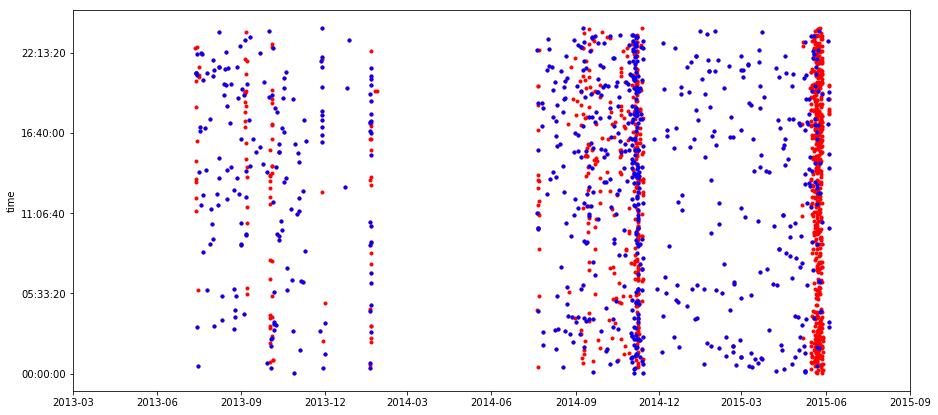

In [259]:
fig, ax = plt.subplots(1, 1, figsize = (15, 7))
ax.plot(DT.date, DT.time, 'r.')
ax.plot(DT.date[DT.CLASS == 1].reset_index(), DT.time[DT.CLASS == 1].reset_index(), 'b.')
#plt.xlim('00:00:00', '23:59:59') 
plt.xlim('2013-03', '2015-09')

In [260]:
d = { 'name' : ['PSY_GANGNAM', 'KATY_ROAR', 'LMFAO_PARTY', 'EMINEM_LOVELIE', 'SHAKIRA_WAKA'], 'views' : [2951311450,2269849627,1348417123,1393162453,1542731300],'release' : ['2012-07-15','2013-09-05','2011-03-08','2010-08-05','2010-06-04']}

In [261]:
df = pd.DataFrame(d)

In [262]:
df.release = df.release.apply(lambda x : parser.parse(x))

In [263]:
df

,name,release,views
0,PSY_GANGNAM,2012-07-15,2951311450
1,KATY_ROAR,2013-09-05,2269849627
2,LMFAO_PARTY,2011-03-08,1348417123
3,EMINEM_LOVELIE,2010-08-05,1393162453
4,SHAKIRA_WAKA,2010-06-04,1542731300


In [264]:
df['release_date'] = [d.date() for d in df.release]

In [265]:
df = df.drop('release', axis = 1)

(735719.0, 735780.0)

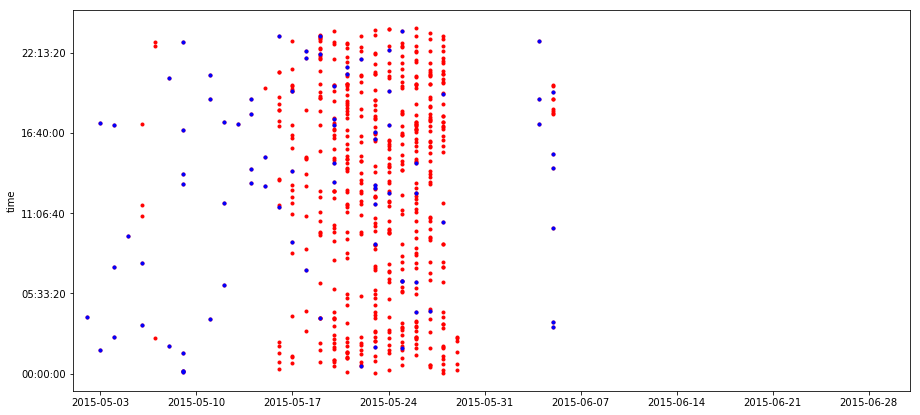

In [266]:
fig, ax = plt.subplots(1, 1, figsize = (15, 7))
ax.plot(DT.date, DT.time, 'r.')
ax.plot(DT.date[DT.CLASS == 1].reset_index(), DT.time[DT.CLASS == 1].reset_index(), 'b.')
#plt.vlines(list(df.release_date), 0, 0.6, linewidth=3)
#plt.xlim('00:00:00', '23:59:59') 
plt.xlim('2015-05', '2015-07')

In [267]:
import itertools as itt

In [268]:
# Read CSV file, get 
authors_notflat = [item for a in New['CONTENT'] for item in a.split(' ')]
authors_notflat = [x.lower() for x in authors_notflat]
authors_notflat
#counter = itt.count(itt.chain.from_iterable(authors_notflat))
# print (counter)
# [item for sublist in authors_notflat for item in sublist]

['follow',
 'my',
 'company',
 'on',
 'twitter',
 '',
 'thanks.',
 '',
 'https://twitter.com/thewaxedhatco\ufeff',
 'please',
 'like',
 ':',
 'http://www.bubblews.com/news/9277547-peace-and-brotherhood\ufeff',
 'you',
 'guys',
 'should',
 'check',
 'out',
 'this',
 'extraordinary',
 'website',
 'called',
 'zonepa.com',
 '.',
 'you',
 'can',
 'make',
 'money',
 'online',
 'and',
 'start',
 'working',
 'from',
 'home',
 'today',
 'as',
 'i',
 'am!',
 'i',
 'am',
 'making',
 'over',
 '$3,000+',
 'per',
 'month',
 'at',
 'zonepa.com',
 '!',
 'visit',
 'zonepa.com',
 'and',
 'check',
 'it',
 'out!',
 'the',
 'meat',
 'discusss',
 'the',
 'successful',
 'memory.',
 'how',
 'does',
 'the',
 'peaceful',
 'unit',
 'arbitrate',
 'the',
 'guide?',
 'the',
 'addition',
 'designs',
 'the',
 'worried',
 'loss.',
 'hello',
 'to',
 'everyone!',
 'please',
 'check',
 'out',
 'my',
 'video:',
 '/watch?v=2b4wywphi8c',
 'it',
 'takes',
 'just',
 '2',
 'minutes,',
 'hope',
 'i',
 'don&#39;t',
 'ask',
 'too

In [269]:
authors_notflat = pd.Series(authors_notflat) #.value_counts()
authors_notflat.value_counts()

                                             1338
i                                             737
the                                           709
this                                          691
and                                           631
to                                            621
my                                            577
out                                           527
you                                           524
a                                             521
check                                         519
on                                            384
is                                            325
of                                            308
video                                         272
it                                            270
for                                           261
like                                          225
in                                            219
me                                            215


In [217]:
len(authors_notflat)

31806

In [237]:
p = authors_notflat.value_counts()/len(authors_notflat)


In [238]:
words = pd.DataFrame(authors_notflat.value_counts())
words ['p'] = p

In [ ]:
def find_word(my_string) :
    authors_notflat.str.find('')